Done reading: 1 gsw curves; 105 data points
Loss at iter 199: 0.0116
Loss at iter 399: 0.0114
Loss at iter 599: 0.0114
Loss at iter 799: 0.0113
Loss at iter 999: 0.0112
Loss at iter 1199: 0.0112
Loss at iter 1399: 0.0111
Loss at iter 1599: 0.0111
Loss at iter 1799: 0.0114
Loss at iter 1999: 0.0114
Loss at iter 2199: 0.0114
Loss at iter 2399: 0.0114
Loss at iter 2599: 0.0114
Loss at iter 2799: 0.0114
Loss at iter 2999: 0.0113
Loss at iter 3199: 0.0113
Loss at iter 3399: 0.0113
Loss at iter 3599: 0.0113
Loss at iter 3799: 0.0113
Loss at iter 3999: 0.0113
Loss at iter 4199: 0.0113
Loss at iter 4399: 0.0113
Loss at iter 4599: 0.0113
Loss at iter 4799: 0.0113
Loss at iter 4999: 0.0113
Loss at iter 5199: 0.0113
Loss at iter 5399: 0.0113
Loss at iter 5599: 0.0113
Loss at iter 5799: 0.0113
Loss at iter 5999: 0.0113
Loss at iter 6199: 0.0113
Loss at iter 6399: 0.0112
Loss at iter 6599: 0.0112
Loss at iter 6799: 0.0112
Loss at iter 6999: 0.0112
Loss at iter 7199: 0.0112
Loss at iter 7399: 0.0112

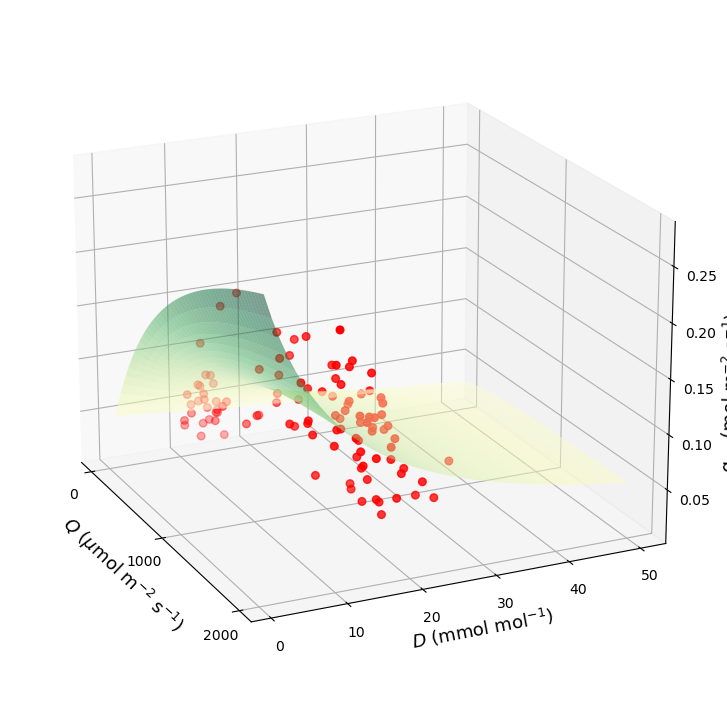

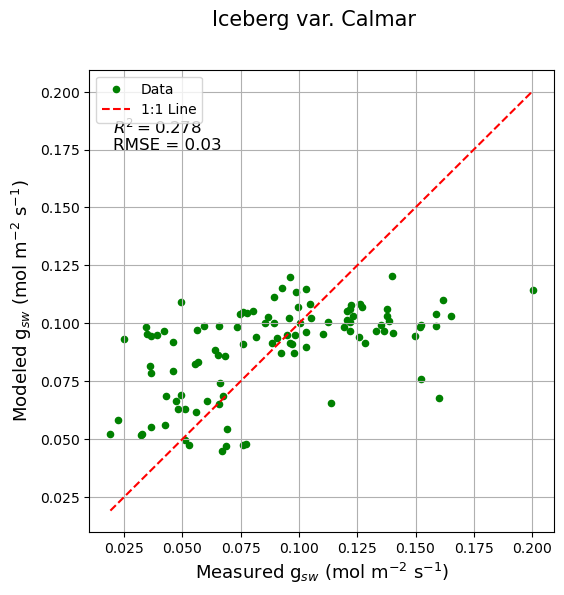

In [2]:
# Process Stomatal Data and Observe the Model Fit
################# User Settings #################

fitting_group_folder_path = "photorch/data/stomatal/survey/iceberg/Iceberg_poro"
species_to_fit = "Iceberg"
species_variety = "Calmar"

#################################################

import pandas as pd
from photorch import *

# Stomatal model fitting
data = pd.read_csv(fitting_group_folder_path+'.csv',skiprows=[0,2])
data["CurveID"] = 0

scd = stomatal.initscdata(data)
scm = stomatal.BMF(scd)
scm = stomatal.fit(scm, learnrate = 0.5, maxiteration = 20000)
gsw = scm.model()
gsw_pred = gsw.detach().numpy()
gsw_meas = scd.gsw.numpy()

parameterPath = util.saveBMFParametersToFile(species_to_fit,species_variety,scm.model)
util.plotBMFModelFit(species_to_fit,species_variety,parameterPath,fitting_group_folder_path+".csv")